In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [570]:
df_results = pd.read_csv('data/results-moreepochs-secondtry.csv', index_col=False)
# df_results = pd.read_csv('data/results_more_epochs.csv')
df_orig = pd.read_csv('data/adult/adult_nonulls.csv')

In [571]:
columns_to_drop = [
    'run_id',
    'epochs', 'num_estimators', 'predictor_structure', 'gnn_structure',
    'learning_rate', 'weight_decay', 'aggregation_function', 'loss_alpha',
    'loss_gamma', 'batchnorm', 'node_features',  'training_columns.1', 'column_dtypes',
    'min_loss', 'final_loss', 'min_valid_loss', 'final_valid_loss'
]
df_results = df_results.drop(columns_to_drop, axis=1)

In [572]:
idx_random = df_results.loc[~df_results['dirty_dataset'].str.contains('samerow')].index
idx_samerow = df_results.loc[df_results['dirty_dataset'].str.contains('samerow')].index
df_results.loc[idx_random, ['samerow']] = False
df_results.loc[idx_samerow, ['samerow']] = True
tgt_col = [f'imp_col_{_}' for _ in  range(1,9)]

In [573]:
df_results['n_imp_col'] = df_results['training_columns'].apply(lambda x: len(x.split('_')))

In [574]:
# df_results['frac_miss'] = df_results['num_missing_values']/([df_orig.shape[0]]*len(df_results)*df_orig.shape[1])*100

In [575]:
df_results['frac_miss']= df_results['num_missing_values']/([df_orig.shape[0]]*len(df_results)*df_results['n_imp_col'])

In [576]:
groups = df_results.groupby(['training_columns'])



education
education-num
marital-status
occupation
race
relationship
workclass
workclass_education
workclass_education_education-num_marital-status
workclass_education_education-num_marital-status_occupation_relationship


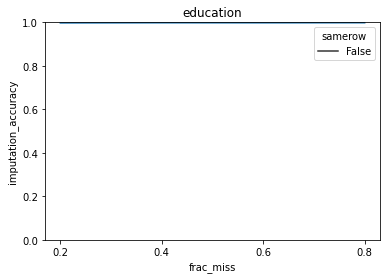

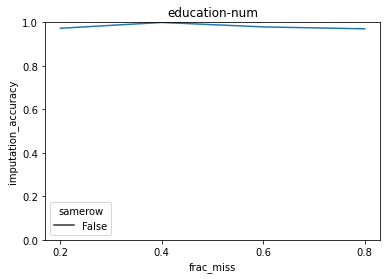

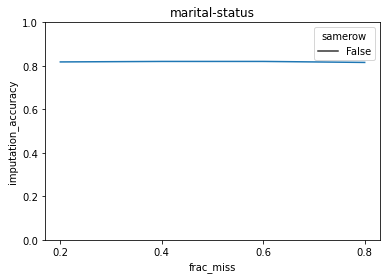

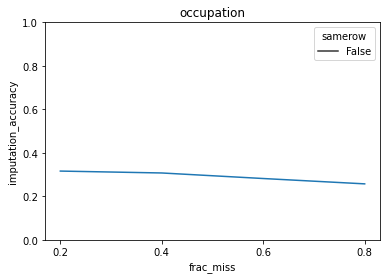

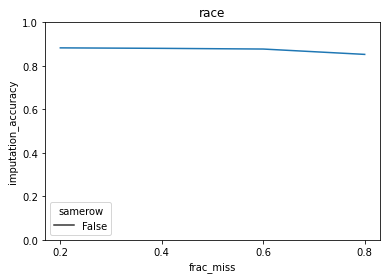

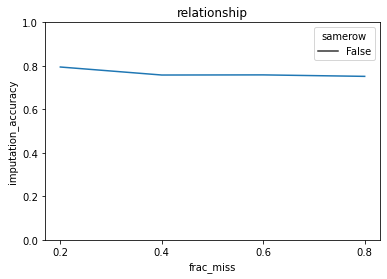

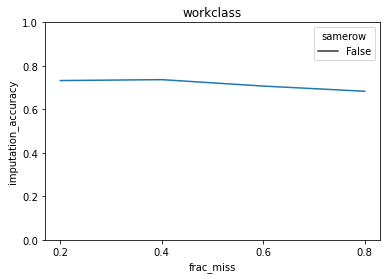

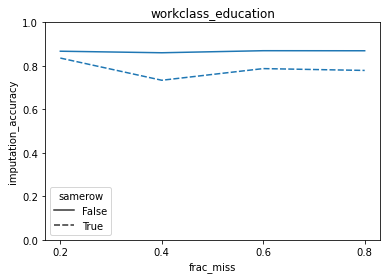

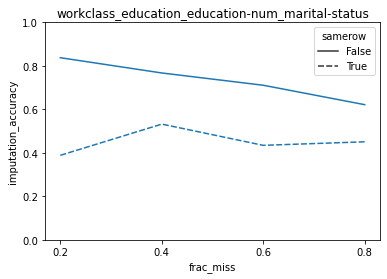

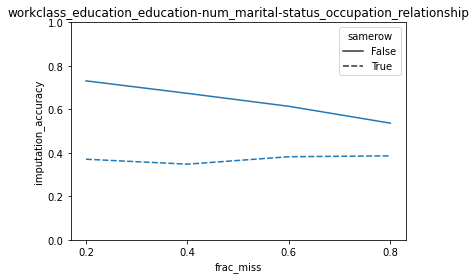

In [577]:
for grp_name, group in groups:
    print(grp_name)
    plt.figure()
    sns.lineplot(x='frac_miss', y='imputation_accuracy', data=group, style='samerow')
    plt.title(grp_name)
    plt.xticks([0.20, 0.40, 0.60, 0.80])
    plt.ylim([0,1])



In [578]:
df_missforest = pd.read_csv('data/results_missforest_adult_big_batch.csv').dropna(how='all')

In [579]:
idx_random = df_missforest.loc[~df_missforest['dirty_dataset'].str.contains('samerow')].index
idx_samerow = df_missforest.loc[df_missforest['dirty_dataset'].str.contains('samerow')].index
df_missforest.loc[idx_random, ['samerow']] = False
df_missforest.loc[idx_samerow, ['samerow']] = True
tgt_col = [f'imp_col_{_}' for _ in  range(1,9)]
df_missforest['n_imp_col'] = df_missforest['training_columns'].apply(lambda x: len(x.split('_')))

In [580]:
# df_missforest['frac_miss'] = df_missforest['num_missing_values']/([df_orig.shape[0]]*len(df_missforest)*df_orig.shape[1])*100

In [581]:
df_missforest['frac_miss']= df_missforest['num_missing_values']/([df_orig.shape[0]]*len(df_missforest)*df_missforest['n_imp_col'])

In [582]:
groups_mf = df_missforest.groupby(['training_columns'])



In [583]:
# for grp_name, group in groups_mf:
#     print(grp_name)
#     plt.figure()
#     sns.lineplot(x='frac_miss', y='imputation_accuracy', data=group, hue='samerow')
#     plt.title(grp_name)
#     plt.xticks([0.20, 0.40, 0.60, 0.80])
#     plt.ylim([0,1])


education
education-num
marital-status
occupation
race
relationship
workclass
workclass_education
workclass_education_education-num_marital-status
workclass_education_education-num_marital-status_occupation_relationship


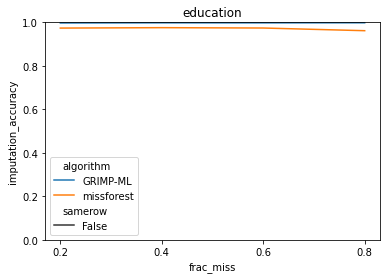

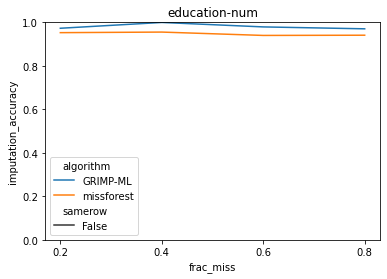

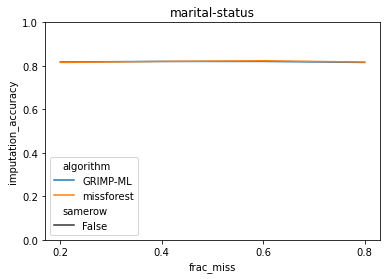

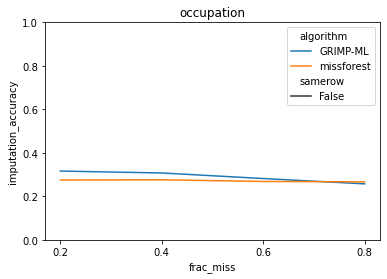

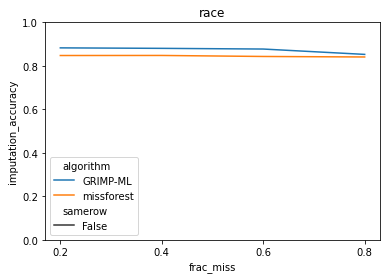

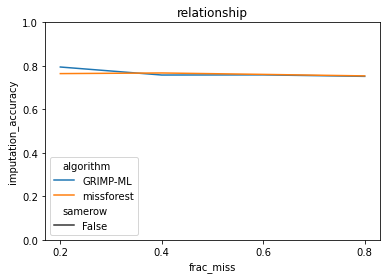

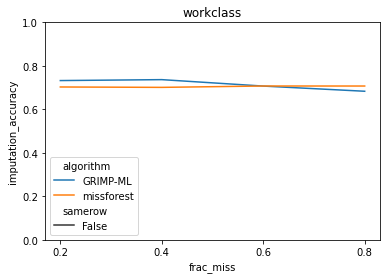

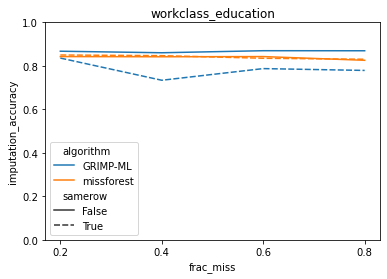

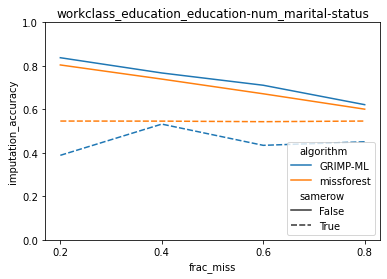

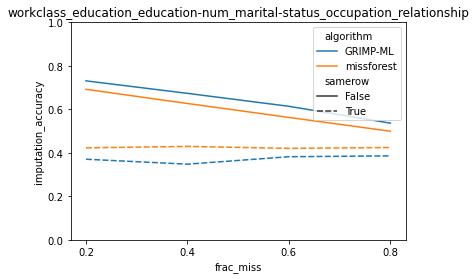

In [584]:
for key in groups.indices:
    print(key)
    group = groups.get_group(key)
    group_mf = groups_mf.get_group(key)
    ff = pd.concat([group, group_mf])
    plt.figure()
    sns.lineplot(x='frac_miss', y='imputation_accuracy', data=ff, style='samerow', hue='algorithm')
    # sns.lineplot(x='frac_miss', y='imputation_accuracy', data=group, style='samerow', palette='Set1', legend=False)
    # sns.lineplot(x='frac_miss', y='imputation_accuracy', data=group_mf, style='samerow', palette='Set2', legend=False)
    plt.title(key)
    plt.xticks([0.20, 0.40, 0.60, 0.80])
    plt.ylim([0, 1])

In [585]:
groups

In [496]:
dff = pd.read_csv('data/results_more_epochs.csv')

